In [58]:
import pandas as pd
import numpy as np

In [62]:


df=pd.read_csv(r"C:\Users\Lenovo\Desktop\ALL FOLDERS\Final\Machine learning\PROJECT Mental Health Survey\Mental Health Survey.csv")
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


# Data Cleaning ans Data PreProcessing

In [63]:
df = df.drop(["state","Country","Timestamp","comments"], axis=1)

In [64]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [65]:
df['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [66]:
df.fillna({'self_employed': df['self_employed'].mode()[0]}, inplace=True)

In [67]:
df['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [68]:
df.fillna({'work_interfere': 'N/A'}, inplace=True)


In [69]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [70]:
df['Age'].value_counts()

Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 50              6
 48              6
 20              6
 51              5
 56              4
 49              4
 57              3
 55              3
 54              3
 47              2
 60              2
-29              1
 329             1
 99999999999     1
 58              1
 62              1
 65              1
-1726            1
 5               1
 53              1
 61              1
 8               1
 11              1
-1               1
 72     

In [71]:
df.drop(df[(df['Age'] > 60) | (df['Age'] < 18)].index, inplace=True)


In [72]:
df['Gender'] = df['Gender'].replace({
    'female': 'Female',
    'f': 'Female',
    'woman': 'Female',
    'cis female': 'Female',
    'femake': 'Female',
    'cis-female/femme': 'Female',
    'female (cis)': 'Female',
    'femail': 'Female'
})


In [73]:
df['Gender'] = df['Gender'].apply(lambda x: x if x in ['Male', 'Female'] else 'Other')


In [74]:
df["Gender"].value_counts()

Gender
Male      611
Other     436
Female    200
Name: count, dtype: int64

In [75]:
df["Gender"].value_counts()

Gender
Male      611
Other     436
Female    200
Name: count, dtype: int64

In [76]:
df['family_history'].value_counts()

family_history
No     759
Yes    488
Name: count, dtype: int64

In [77]:
df['treatment'].value_counts()

treatment
Yes    630
No     617
Name: count, dtype: int64

In [78]:
df['work_interfere'].value_counts()

work_interfere
Sometimes    463
N/A          261
Never        210
Rarely       173
Often        140
Name: count, dtype: int64

In [79]:
df['no_employees'].value_counts()

no_employees
6-25              288
26-100            288
More than 1000    280
100-500           175
1-5               157
500-1000           59
Name: count, dtype: int64

In [80]:
df['obs_consequence'].value_counts() # here i calculated all vlaues_count and correct them 

obs_consequence
No     1068
Yes     179
Name: count, dtype: int64

In [81]:
print(df.columns)


Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')


In [82]:
df['care_options'].value_counts()


care_options
No          497
Yes         438
Not sure    312
Name: count, dtype: int64

In [83]:
df['coworkers'] = df['coworkers'].replace({
    'Some of them': 'Yes'
})


In [84]:
df['supervisor'] = df['supervisor'].replace({
    'Some of them': 'Yes'
})


In [85]:
df['leave'].value_counts()

leave
Don't know            560
Somewhat easy         264
Very easy             202
Somewhat difficult    125
Very difficult         96
Name: count, dtype: int64

In [86]:
df = df[df['leave'].notnull()].reset_index(drop=True)


In [87]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

# Encoding

In [88]:
print(df.columns)

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')


In [89]:
# Split data first before any encoding
x = df.drop("treatment", axis=1)
y = df["treatment"]


In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


In [91]:
x = df.drop("treatment", axis=1)
y = df["treatment"]

In [92]:
ct = ColumnTransformer(
    [('oe', OrdinalEncoder(), 
      ['Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview',
       'phys_health_interview', 'mental_vs_physical', 'obs_consequence'])],
    remainder='passthrough'
)

In [93]:
x=ct.fit_transform(x)

In [94]:
le=LabelEncoder()
y=le.fit_transform(y)

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [97]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((872, 22), (375, 22), (872,), (375,))

# Model 

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [99]:
model_dict = {}

model_dict['Logistic regression'] = LogisticRegression(solver='liblinear', random_state=49)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=49)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=49)
model_dict['XGB Classifier'] = XGBClassifier(random_state=49)


In [100]:
def model_test(x_train, x_test, y_train, y_test, model, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("-----------------------------------------------------------------------------------")
    print("Model: {}".format(model_name))
    print("Accuracy Score: {:.2f}".format(accuracy))
    print()

In [101]:
for model_name, model in model_dict.items():
    model_test(x_train, x_test, y_train, y_test, model, model_name)

-----------------------------------------------------------------------------------
Model: Logistic regression
Accuracy Score: 0.77

-----------------------------------------------------------------------------------
Model: KNN Classifier
Accuracy Score: 0.74

-----------------------------------------------------------------------------------
Model: Decision Tree Classifier
Accuracy Score: 0.71

-----------------------------------------------------------------------------------
Model: Random Forest Classifier
Accuracy Score: 0.80

-----------------------------------------------------------------------------------
Model: AdaBoost Classifier
Accuracy Score: 0.81

-----------------------------------------------------------------------------------
Model: Gradient Boosting Classifier
Accuracy Score: 0.79

-----------------------------------------------------------------------------------
Model: XGB Classifier
Accuracy Score: 0.78



In [102]:
abc=AdaBoostClassifier(random_state=99)
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print('Accuracy of AdaBoost= ',accuracy_score(y_test,pred_abc))

Accuracy of AdaBoost=  0.8053333333333333


In [112]:
from sklearn.model_selection import RandomizedSearchCV

params_abc = {
    'n_estimators': [int(x) for x in np.linspace(start=1, stop=50, num=15)],      #linspace : It is a function in NumPy used to create a list of evenly 
                                                                                  #spaced numbers between two given values.
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
}

abc_random = RandomizedSearchCV(
    random_state=49,
    estimator=abc,
    param_distributions=params_abc,
    n_iter=50,
    cv=5,
    n_jobs=-1
)


In [114]:
abc_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [115]:
abc_random.best_params_

{'n_estimators': 29, 'learning_rate': 0.97}

In [116]:
abc_tuned = AdaBoostClassifier(random_state=49, n_estimators=29, learning_rate=0.97)
abc_tuned.fit(x_train, y_train)
pred_abc_tuned = abc_tuned.predict(x_test)
print('Accuracy of Adaboost(tuned)=', accuracy_score(y_test, pred_abc_tuned))

Accuracy of Adaboost(tuned)= 0.8026666666666666


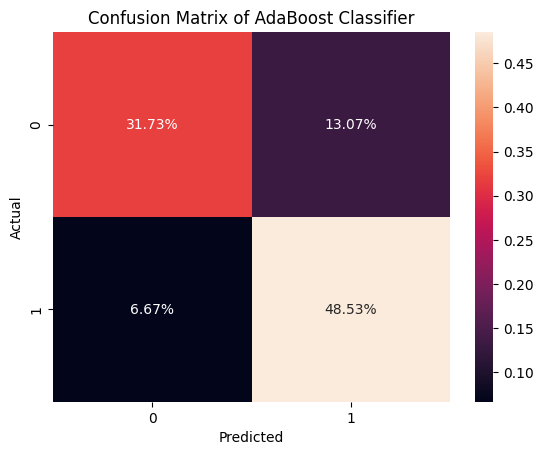

In [117]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cf_matrix = confusion_matrix(y_test, pred_abc_tuned)

# Normalize and plot the heatmap
sb.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [118]:
print(classification_report(y_test,pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       168
           1       0.79      0.88      0.83       207

    accuracy                           0.80       375
   macro avg       0.81      0.79      0.80       375
weighted avg       0.81      0.80      0.80       375



In [119]:
import pickle

# Give full path for saving model
model_path = r"C:\Users\Lenovo\Desktop\ALL FOLDERS\Final\Machine learning\PROJECT Mental Health Survey\model.pkl"
encoder_path = r"C:\Users\Lenovo\Desktop\ALL FOLDERS\Final\Machine learning\PROJECT Mental Health Survey\encoder.pkl"

# Save the model
with open(model_path, "wb") as f:
    pickle.dump(abc_tuned, f)

# Save the encoder
with open(encoder_path, "wb") as f:
    pickle.dump(ct, f)
